# Matplotlib 数据可视化

Matplotlib是一个跨平台的数据可视化库，构建于NumPy数组之上，并与更广泛的SciPy生态系统协同工作，Matplotlib的核心优势之一在于它对多操作系统和图形后端的兼容性。它支持数十种后端和输出类型，无论你使用何种操作系统或需要何种输出格式，都能稳定运行。

导入 Matplotlib

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

设置绘图样式：
我们将使用plt.style指令为图表选择合适的美观样式。但其实没啥用，我们最常还是在经典格式下进行图表设计，当然你完全可以跳过这一步，没什么影响

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

plt.style.use('classic')这句话是针对全局修改风格的，因此他只能是plt的一个方法，后续的表格基于这句话就会全部默认使用它所指定的风格

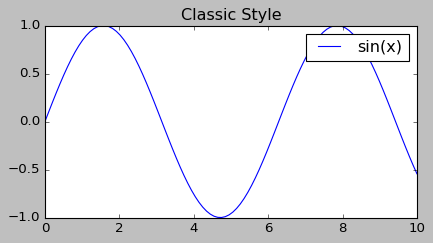

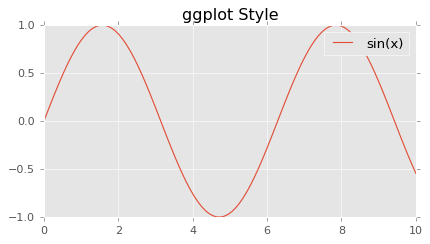

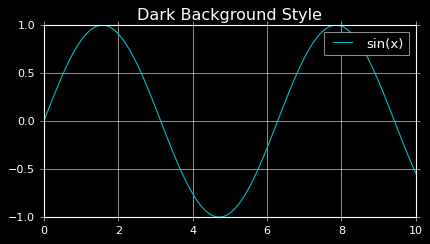

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 准备数据
x = np.linspace(0, 10, 100)
y = np.sin(x)

# 风格1: classic
plt.style.use('classic')
plt.figure(figsize=(6,3)) #创建6英寸宽、3英寸高的图形
plt.plot(x, y, label='sin(x)') #绘制x-y曲线，设置图例标签
plt.title('Classic Style') #添加标题
plt.legend() #显示图例
plt.show() #展示图形

# 风格2: ggplot
plt.style.use('ggplot')
plt.figure(figsize=(6,3))
plt.plot(x, y, label='sin(x)')
plt.title('ggplot Style')
plt.legend()
plt.show()

# 风格3: dark_background
plt.style.use('dark_background')
plt.figure(figsize=(6,3))
plt.plot(x, y, 'c-', label='sin(x)')
plt.title('Dark Background Style')
plt.legend()
plt.show()


Matplotlib图表的展示方式取决于具体环境。大致可分为以下三种适用环境：在脚本中使用、在IPython终端中使用，或在Jupyter笔记本中使用。

要是你在脚本中运用 Matplotlib，那么必须使用 plt.show 函数，运行这个脚本，这样就会弹出一个窗口，显示出你绘制的图表，我们建议每个 Python 会话中，plt.show 命令只能使用一次，而且通常是在脚本的最后使用。多次使用 show 命令可能会引发依赖后端的不可预测行为

Matplotlib同样能在IPython Shell中无缝工作。在启动ipython后，可以通过%matplotlib魔术命令开启该模式，此时，任何plt绘图命令都会自动打开图表窗口，后续命令还能动态更新图表。但某些操作（如修改已绘制线条的属性）不会自动刷新，此时需调用plt.draw强制重绘。在IPython的Matplotlib模式下，无需使用plt.show

在Jupyter Notebook中交互式绘图同样通过%matplotlib命令实现，其工作原理与IPython Shell类似。你可以选择两种方式将图形直接嵌入到Notebook中：
- %matplotlib inline 会将图表以静态图像形式嵌入Notebook。
- %matplotlib notebook 会将图表以交互式图表形式嵌入Notebook。¶

### 第二部分

Matplotlib的一个实用功能是支持将图表保存为多种格式。通过savefig命令即可轻松实现图表导出。例如，若要将之前的图表保存为PNG文件，可以运行以下代码：

In [2]:
plt.savefig('my_figure.png')

<Figure size 640x480 with 0 Axes>

文件名可以指定路径（如../images/my_figure.png）
支持的文件格式包括PNG、PDF、SVG、EPS等

到了这里你可能会感到好奇，我们的代码只允许存在一个图表吗？多个图表的代码程序是如何分配图表的指令的？产生这点疑问的原因不难理解，因为所有的图表都叫做plt

Matplotlib一个可能让人感到困惑的特性是其双重接口：一个是类似MATLAB的基于状态的便捷接口，另一个是功能更强大的面向对象接口。

MATLAB风格接口通过pyplot（通常缩写为plt）模块提供，允许用户以类似MATLAB的方式逐步构建图表。其会自动维护当前图表（Figure）和子图（Axes）对象，用户无需显式创建它们。这种隐式机制使得快速绘图变得非常方便，但很容易遇到问题。例如，一旦创建了第二个子图，我们要如何回过头来给第一个子图添加内容呢？

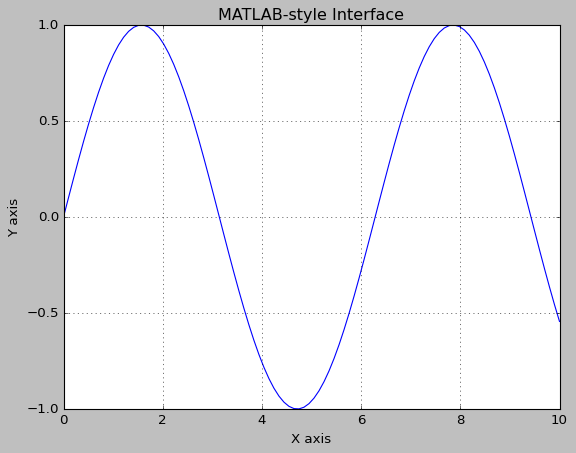

In [56]:
# 生成测试数据
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.style.use('classic')    #风格改回经典

# ========== MATLAB风格接口 ==========
plt.figure()  # 隐式创建图形
plt.plot(x, y)  # 隐式使用当前坐标轴
plt.title('MATLAB-style Interface')
plt.xlabel('X axis') # 设置x轴标签
plt.ylabel('Y axis') # 设置y轴标签
plt.grid(True)  # 显示网格线
plt.show()

这一点是可以被解决的，需要认识到这个接口是有状态的：它会跟踪“当前”的图形和坐标轴，所有的 plt 命令都会应用到这里。你可以使用 plt.gcf（获取当前图形）和 plt.gca（获取当前坐标轴）函数来获取它们的引用。¶

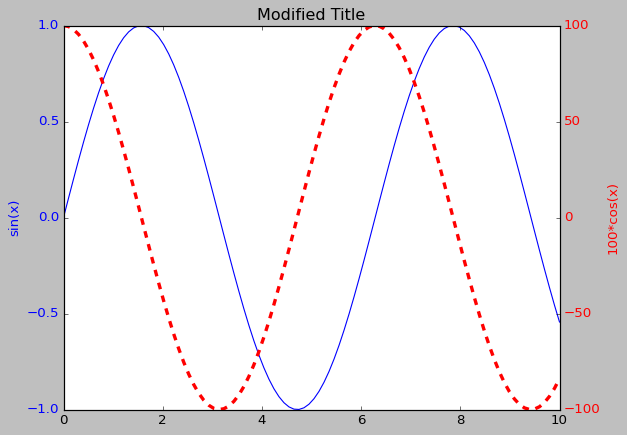

In [57]:
# 生成测试数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)*100  # 量纲差异大的数据

# MATLAB风格创建双坐标轴
plt.figure()
plt.plot(x, y1, 'b-')  # 第一个坐标轴(蓝色曲线)
plt.ylabel('sin(x)', color='b')
plt.tick_params(axis='y', labelcolor='b')

# 创建第二个坐标轴并操作
ax2 = plt.twinx()  # 共享x轴的新坐标轴
ax2.plot(x, y2, 'r--')  # 第二个坐标轴(红色虚线)
ax2.set_ylabel('100*cos(x)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 返回修改第一个坐标轴
plt.gca().set_title('Modified Title')  # 获取当前主坐标轴
plt.gca().set_xlabel('Common X-axis')  # 添加x轴标签
plt.gca().lines[0].set_linewidth(3)  # 加粗第一条曲线

plt.show()

面向对象接口要求用户显式创建Figure和Axes对象，然后调用这些对象的方法进行绘图。这种方式更灵活，适合需要精确控制图表元素的场景，例如多子图布局、自定义坐标轴等。每个Axes对象代表一个独立的绘图区域，可以分别设置属性。

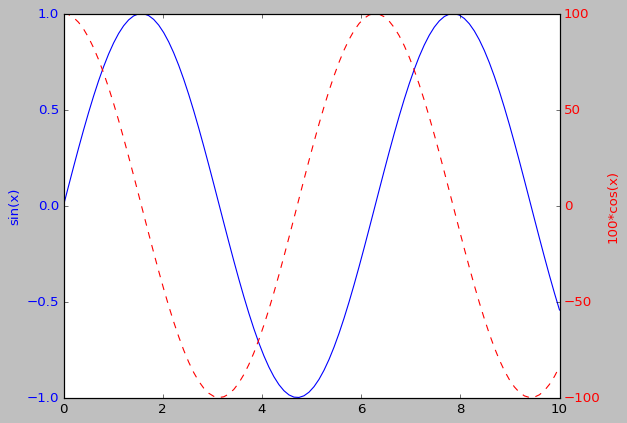

In [58]:

# 创建Figure和主Axes对象
fig, ax1 = plt.subplots()  

# 生成数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)*100  # 量纲差异大的数据

# 主坐标轴绘图
ax1.plot(x, y1, 'b-')
ax1.set_ylabel('sin(x)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 创建次坐标轴
ax2 = ax1.twinx()  # 共享x轴
ax2.plot(x, y2, 'r--')
ax2.set_ylabel('100*cos(x)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.show()

再进一步的

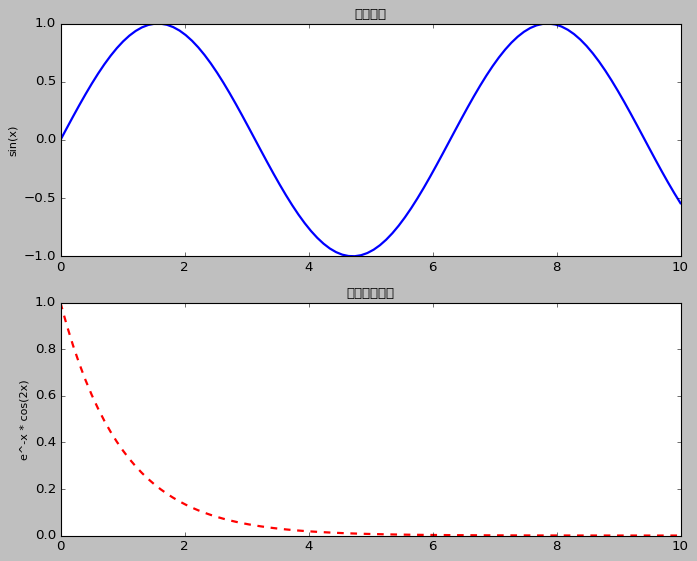

In [60]:

# 创建Figure对象和2x1的子图布局
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# 生成测试数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.exp(-x)

# 第一个子图设置
ax1.plot(x, y1, 'b-', linewidth=2)
ax1.set_title('正弦函数', fontsize=12)
ax1.set_ylabel('sin(x)', fontsize=10)

# 第二个子图设置
ax2.plot(x, y2, 'r--', linewidth=2)
ax2.set_title('衰减余弦函数', fontsize=12)
ax2.set_ylabel('e^-x * cos(2x)', fontsize=10)

# 调整子图间距
plt.show()


# 简单的绘图

或许所有图表中最简单的就是对单个函数 y=f（x）
 进行可视化：

首先创建一个图形（figure）和坐标轴（axes），可以按如下方式完成：

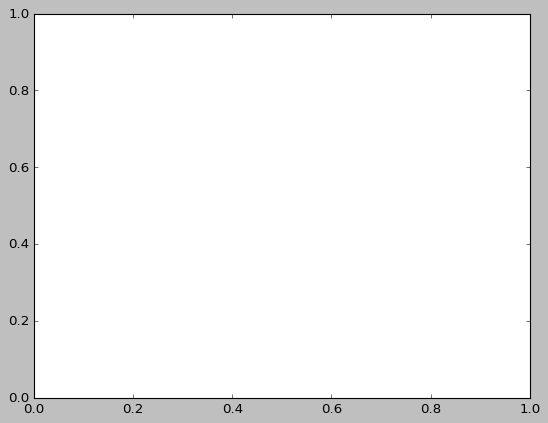

In [61]:
import numpy as np
import matplotlib.pyplot as plt
# 创建图形和坐标轴
fig, ax = plt.subplots()

我们生成一些示例数据

In [62]:
# 生成数据
x = np.linspace(0, 10, 1000)

现在，绘制它

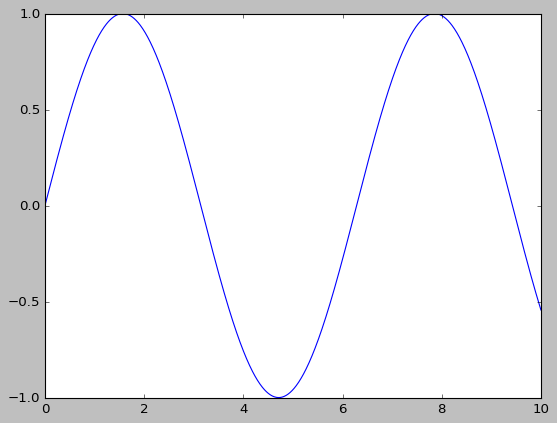

In [63]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))

在Matplotlib中，“figure”（plt.Figure类的一个实例）可以被看作是一个单一的容器，其中包含了所有表示坐标轴、图形、文本和标签的对象。
“axes”（plt.Axes类的一个实例）就是我们上面看到的：一个带有刻度、网格线和标签的边界框，最终它将包含构成我们可视化内容的绘图元素。
一旦我们创建好了一个坐标轴，就可以使用ax.plot方法来绘制一些数据。

如果我们想在一个图形中绘制多条线，只需多次调用 plot 方法即可：

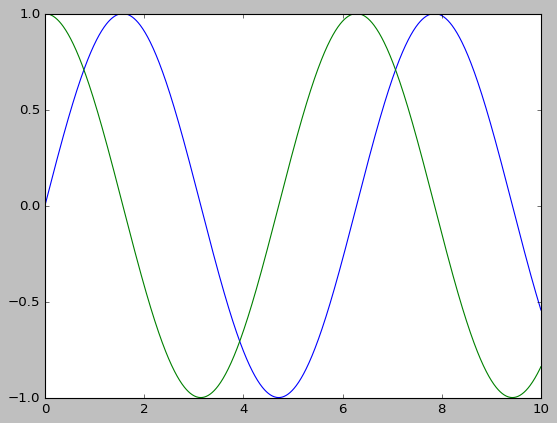

In [64]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))

ax.plot 方法接受额外的参数来指定线条的颜色和样式。

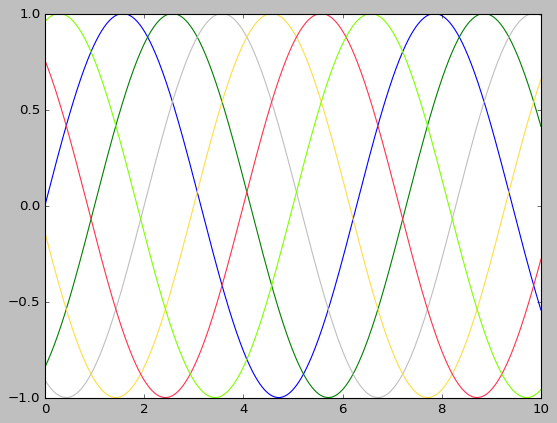

In [65]:
x = np.linspace(0, 10, 1000)

# 创建图形并绘图
fig, ax = plt.subplots()
ax.plot(x, np.sin(x - 0), color='blue')          # specify color by name
ax.plot(x, np.sin(x - 1), color='g')             # short color code (rgbcmyk)
ax.plot(x, np.sin(x - 2), color='0.75')          # grayscale between 0 and 1
ax.plot(x, np.sin(x - 3), color='#FFDD44')       # hex code (RRGGBB, 00 to FF)
ax.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3))   # RGB tuple, values 0 to 1
ax.plot(x, np.sin(x - 5), color='chartreuse')    # HTML color names supported

如果未指定颜色，Matplotlib 会自动为多条线循环使用一组默认颜色。

可以使用 linestyle 关键字来调整线条样式（见下图）：

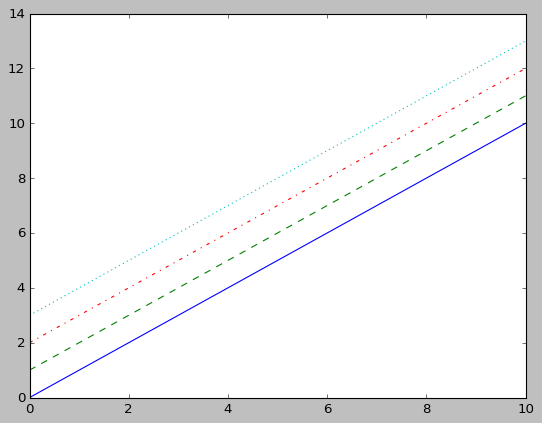

In [66]:
fig, ax = plt.subplots()
# 线条样式
ax.plot(x, x + 0, linestyle='solid')
ax.plot(x, x + 1, linestyle='dashed')
ax.plot(x, x + 2, linestyle='dashdot')
ax.plot(x, x + 3, linestyle='dotted')

可以组合 linestyle 和 color：

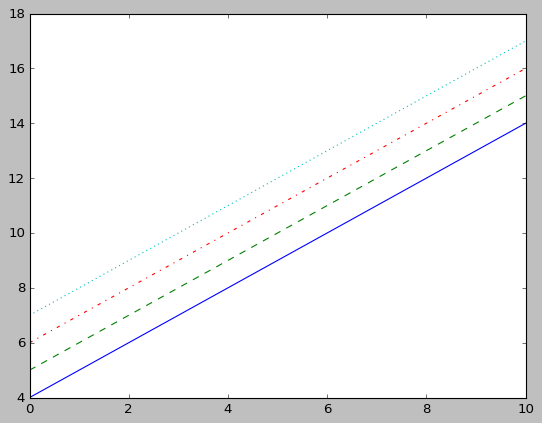

In [67]:
fig, ax = plt.subplots()
# 简写
ax.plot(x, x + 4, linestyle='-')  # solid
ax.plot(x, x + 5, linestyle='--') # dashed
ax.plot(x, x + 6, linestyle='-.') # dashdot
ax.plot(x, x + 7, linestyle=':')  # dotted


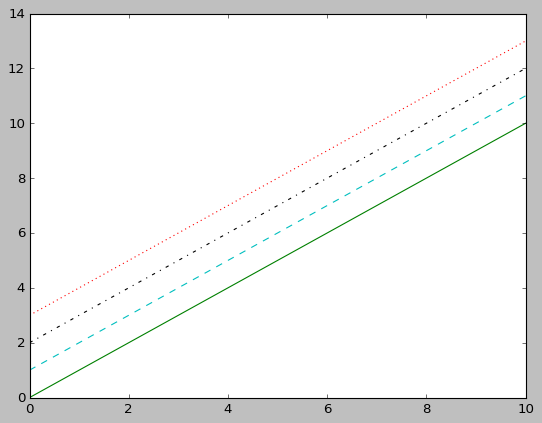

In [68]:
fig, ax = plt.subplots()
# 组合 linestyle 和 color
ax.plot(x, x + 0, '-g')  # solid green
ax.plot(x, x + 1, '--c') # dashed cyan
ax.plot(x, x + 2, '-.k') # dashdot black
ax.plot(x, x + 3, ':r')  # dotted red

调整图形：坐标轴范围

(-1.5, 1.5)

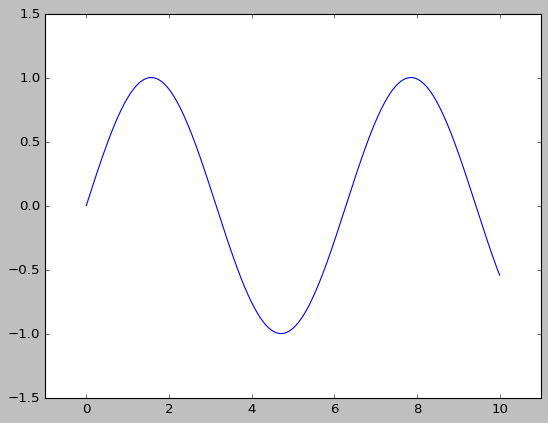

In [69]:
# 生成数据
x = np.linspace(0, 10, 1000)

# 创建图形并绘图
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))

# 设置坐标轴范围
ax.set_xlim(-1, 11)
ax.set_ylim(-1.5, 1.5)

也可以显示反转的坐标轴

(1.2, -1.2)

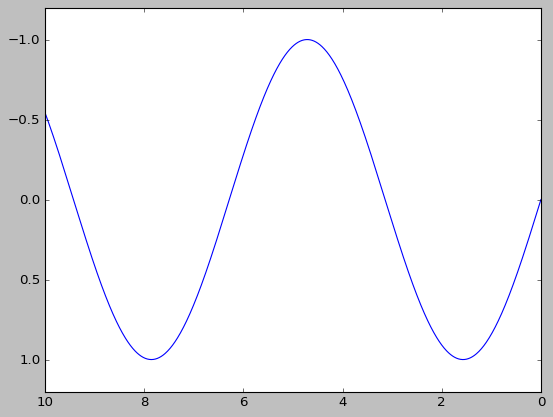

In [70]:
# 创建图形并绘图
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))

#显示反转的坐标轴
ax.set_xlim(10, 0)
ax.set_ylim(1.2, -1.2)

(np.float64(-1.0), np.float64(11.0), np.float64(-1.5), np.float64(1.5))

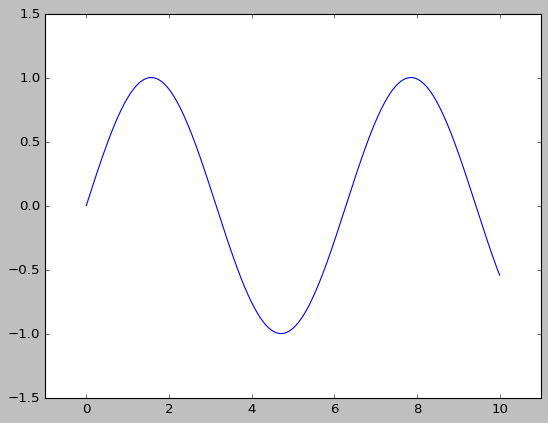

In [71]:
# 创建图形并绘图
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))

#使用 axis 方法设置范围
ax.axis([-1, 11, -1.5, 1.5])

(np.float64(0.0), np.float64(10.0), np.float64(-1.0), np.float64(1.0))

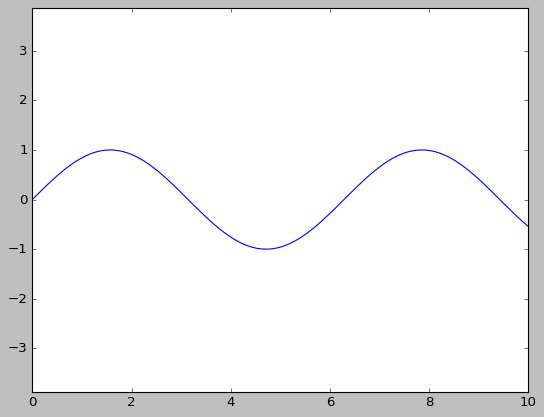

In [72]:
# 创建图形并绘图
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))

#使用 axis 方法设置范围
ax.axis([-1, 11, -1.5, 1.5])

#自动收紧坐标轴
ax.axis('tight')

#x 轴和 y 轴单位相等
ax.axis('equal')

其它 axis 选项包括：'on', 'off', 'square', 'image'，参见plt.axis文档。

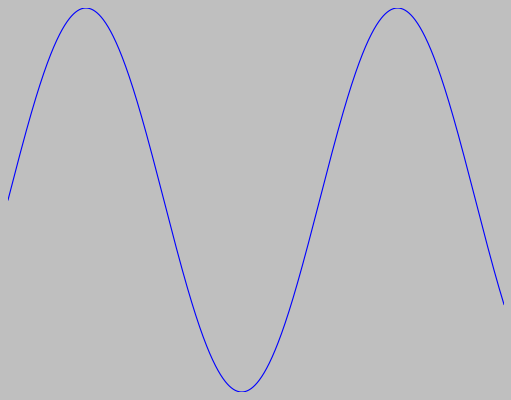

In [73]:
# 创建图形并绘图
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))

ax.axis('off');

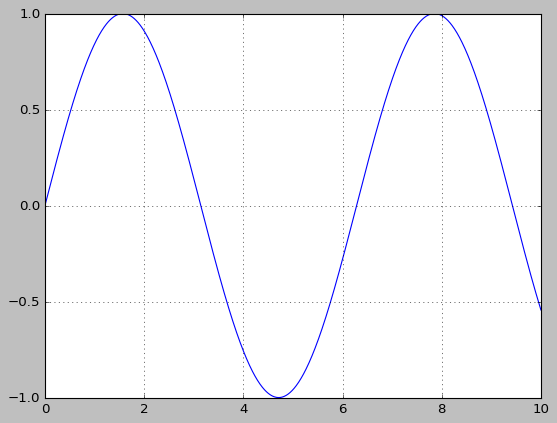

In [74]:
# 创建图形并绘图
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
#显示网格线
ax.grid()

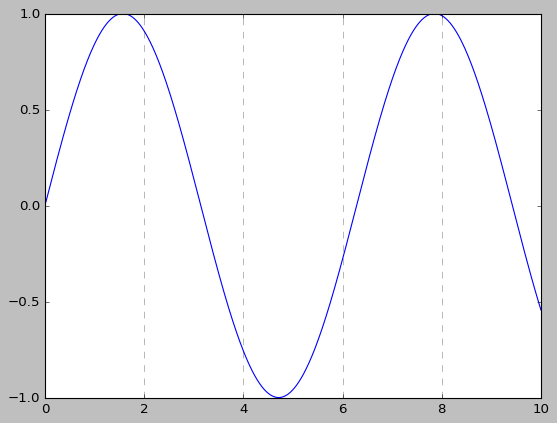

In [75]:
# 创建图形并绘图
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
# 显示横线（x 轴网格线）
ax.grid(axis='x', linestyle='--', alpha=0.5)  # 只显示 x 轴网格线（横线）

设置图形标注

Text(0, 0.5, 'sin(x)')

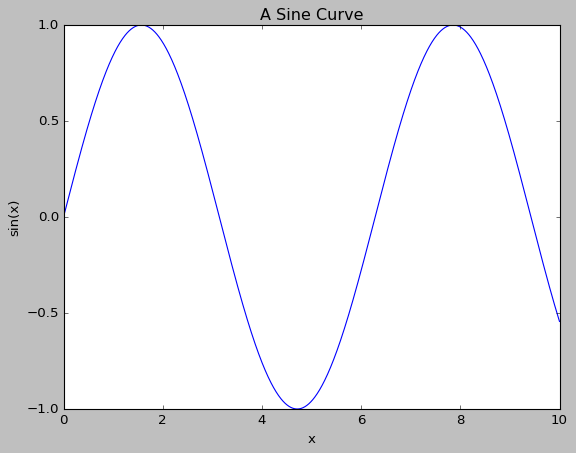

In [76]:

# 生成数据
x = np.linspace(0, 10, 1000)

# 创建图形并绘图
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))

# 设置标题和坐标轴标签
ax.set_title("A Sine Curve")
ax.set_xlabel("x")
ax.set_ylabel("sin(x)")

当在单个坐标轴内展示多条线时，创建一个为每种线类型标注的图例是很有用的：

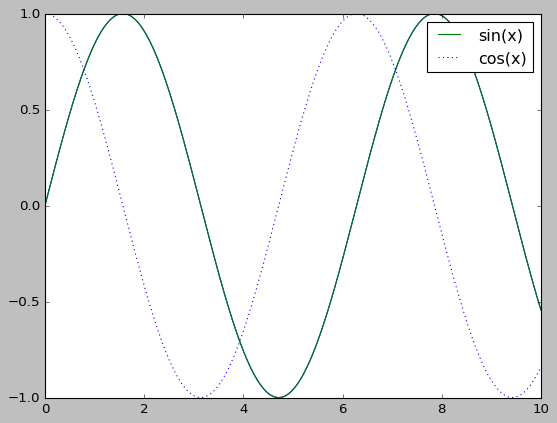

In [77]:

# 创建图形并绘图
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))

# 设置图例
ax.plot(x, np.sin(x), '-g', label='sin(x)')
ax.plot(x, np.cos(x), ':b', label='cos(x)')
ax.legend()

在面向对象的绘图接口中，使用 ax.set 方法可以一次性设置所有这些属性：

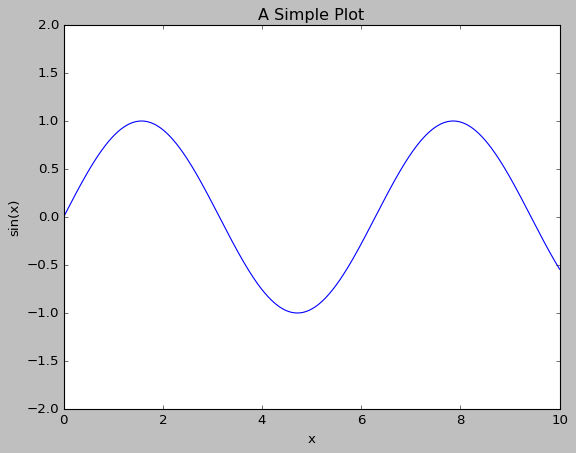

In [78]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))

ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

# 散点图

用 plt.plot 画散点图

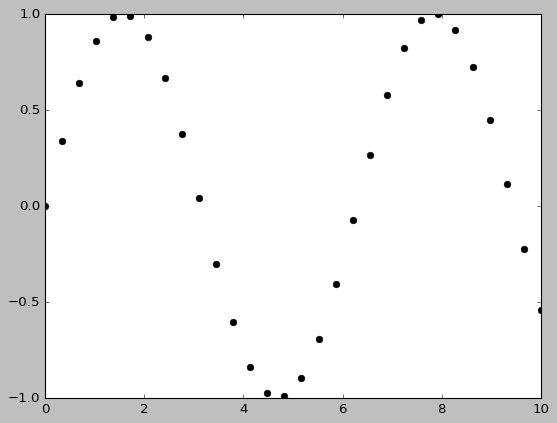

In [79]:
fig, ax = plt.subplots()

x = np.linspace(0, 10, 30)
y = np.sin(x)

ax.plot(x, y, 'o', color='black');

显然，越密，越连续

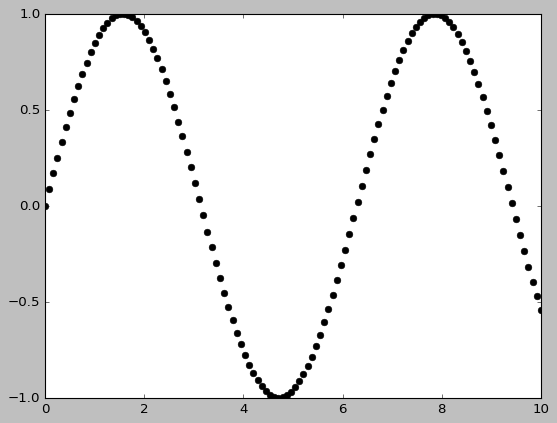

In [80]:
fig, ax = plt.subplots()

x = np.linspace(0, 10, 120)
y = np.sin(x)

ax.plot(x, y, 'o', color='black');

函数调用中的第三个参数是一个字符，它代表绘图时所使用的符号类型，常见的符号（见下图）：

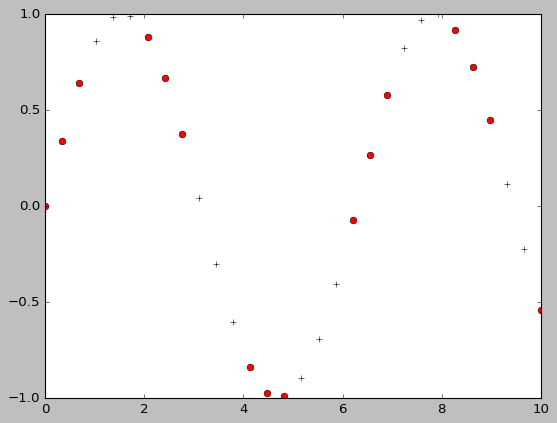

In [81]:
fig, ax = plt.subplots()
x = np.linspace(0, 10, 30)
y = np.sin(x)

for xi, yi in zip(x, y):
    if int(xi) % 2 == 1:  # 奇数点
        ax.plot(xi, yi, marker='+', color='black', linestyle='')
    else:  # 偶数点
        ax.plot(xi, yi, marker='o', color='red', linestyle='')

用如下简写的方式更为方便和常见：

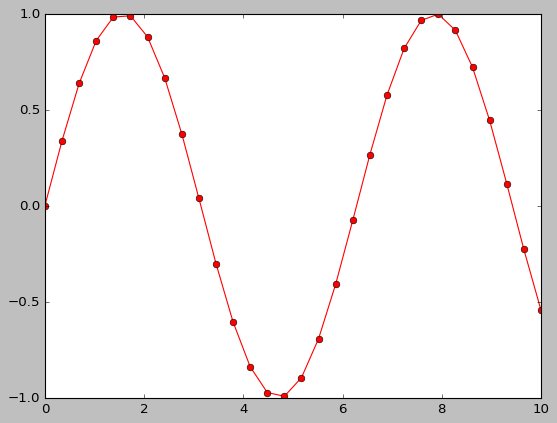

In [82]:
fig, ax = plt.subplots()
x = np.linspace(0, 10, 30)
y = np.sin(x)
ax.plot(x, y, '-or');

可以指定 plt.plot 中线条和标记的各种属性，如下图所示：

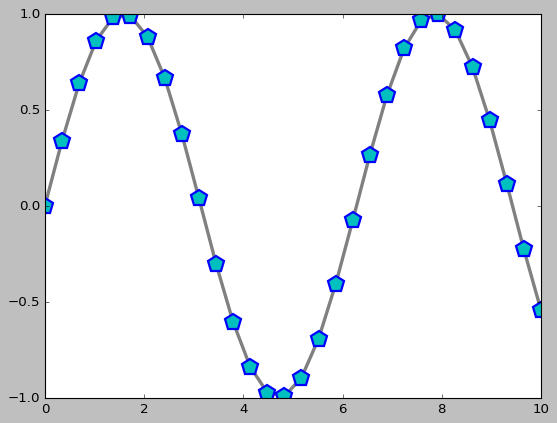

In [83]:
fig, ax = plt.subplots()
x = np.linspace(0, 10, 30)
y = np.sin(x)
ax.plot(x, y, '-p', color='gray', linewidth=3,
         markersize=15, 
         markerfacecolor='c',
         markeredgecolor='b',
         markeredgewidth=2)


plt.scatter 创建散点图时，每个点的属性（大小、面颜色、边颜色等）都可以单独控制：

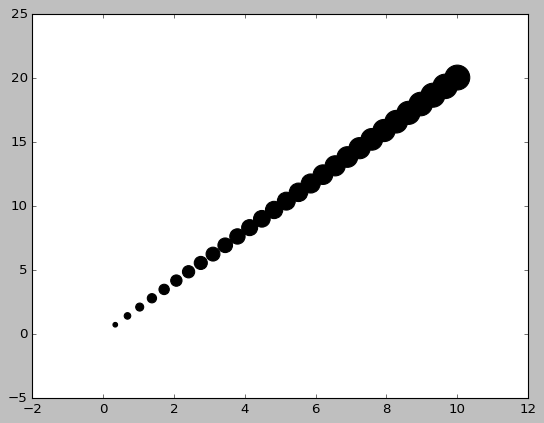

In [84]:
fig, ax = plt.subplots()
x = np.linspace(0, 10, 30)
y = 2*x

# 计算点的大小，x值越大点越大
sizes = x * 50  # 20是缩放因子，可根据需要调整

ax.scatter(x, y, s=sizes, color='black')

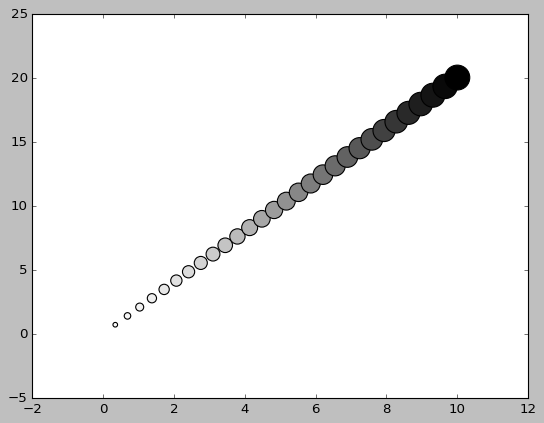

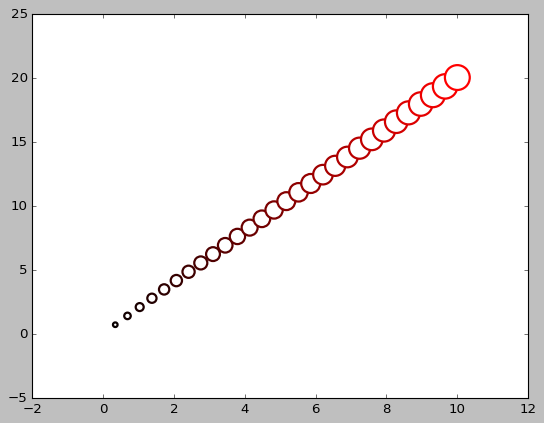

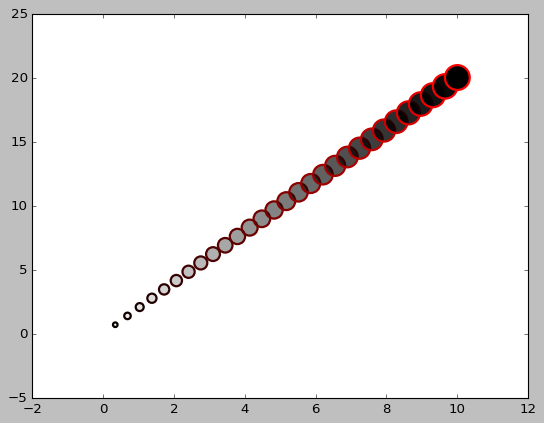

In [85]:

# 示例1：内部颜色随x变黑
fig1, ax1 = plt.subplots()
x = np.linspace(0, 10, 30)
y = 2*x
sizes = x * 50
# 将x值归一化为0-1范围用于颜色映射
colors = x/max(x)
ax1.scatter(x, y, s=sizes, c=colors, cmap='Greys')

# 示例2：边缘颜色随x变红
fig2, ax2 = plt.subplots()
edge_colors = [(xi/max(x), 0, 0) for xi in x]  # R通道随x增大
ax2.scatter(x, y, s=sizes, facecolor='white', 
           edgecolors=edge_colors, linewidths=2)

# 示例3：内部变黑+边缘变红
fig3, ax3 = plt.subplots()
face_colors = [(0, 0, 0, xi/max(x)) for xi in x]  # 透明度随x变化
edge_colors = [(xi/max(x), 0, 0, 1) for xi in x]  # 红色随x加深
ax3.scatter(x, y, s=sizes, facecolor=face_colors, 
           edgecolor=edge_colors, linewidths=2)


当数据集规模超过几千个点时，plt.plot的效率会显著高于plt.scatter。
原因在于plt.scatter能够为每个点渲染不同的大小和（或）颜色，因此渲染器必须为每个点单独进行额外的构建工作。

另一方面，plt.plot中每个点的标记都完全相同，所以确定这些点外观的工作对于整个数据集仅需执行一次。
对于大规模数据集而言，这种差异会导致性能上的巨大差距。基于此，在处理大规模数据集时，plt.plot比plt.scatter更具优势。¶

# 可视化不确定性

在数据和结果的可视化过程中，有时需要展示测量的误差，即在测量值附近上下的误差范围。

基本误差线 (errorbar)

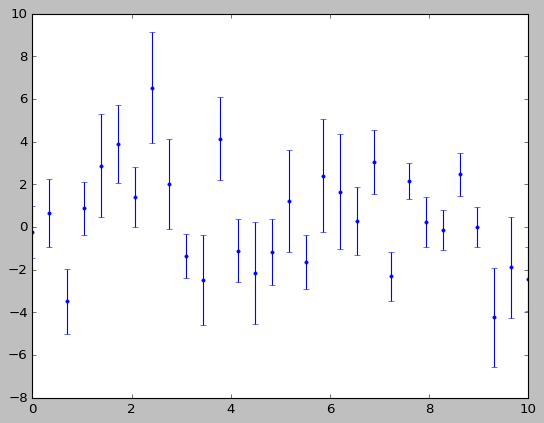

In [86]:
x = np.linspace(0, 10, 30)
dy = 0.8 + 2 * np.random.rand(30)
y = np.sin(x) + dy * np.random.randn(30)

plt.errorbar(x, y, yerr=dy, fmt='.');

还可以自定义误差线图的外观，特别是在数据点较为密集的图表中，将误差线设置得比数据点本身颜色更好看：

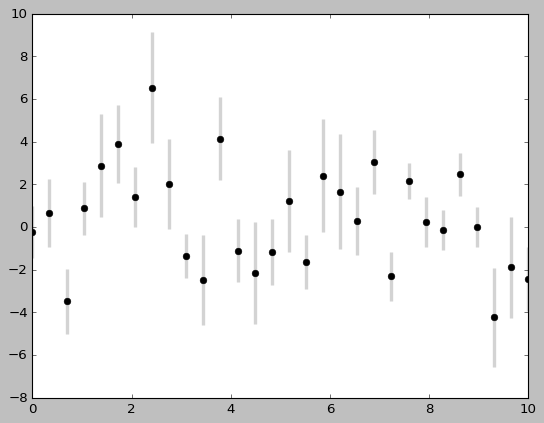

In [87]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

# 密度图和等高图

有时，利用等高线图或彩色图在二维平面上展示三维数据很有用。¶

可以使用 plt.contour 函数来创建等高线图。它需要三个参数：一个 x 值的网格、一个 y 值的网格以及一个 z 值的网格。x 和 y 的值表示图上的位置，而 z 的值将由等高线的等级来表示。或许准备这类数据最直接的方法是使用 np.meshgrid 函数，它能从一维数组构建出二维网格：


(40, 50) (40, 50)


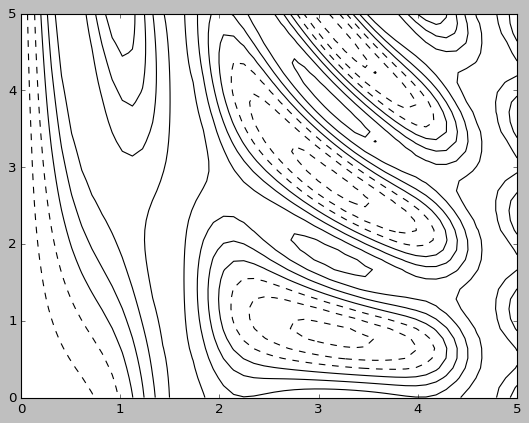

In [88]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

#使用NumPy的linspace函数创建从0到5的等间距数组
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

#meshgrid函数将一维的x和y数组转换为二维的网格坐标矩阵
#X矩阵：每一行都是x数组的复制，行数等于y数组的长度(40)
#Y矩阵：每一列都是y数组的复制，列数等于x数组的长度(50)
#这样X和Y共同定义了网格上每个点的(x,y)坐标
X, Y = np.meshgrid(x, y)
print(X.shape, Y.shape)

Z = f(X, Y)
#使用matplotlib的contour函数绘制等高线
#X, Y：网格坐标
#Z：每个点的函数值
#colors='black'：设置等高线颜色为黑色
plt.contour(X, Y, Z, colors='black');

请注意，当使用单一颜色时，负值由虚线表示，正值由实线表示。或者，也可以通过使用 cmap 参数指定一个颜色映射表来为线条设置颜色编码。¶在这里我们选择了 RdGy（“红色 - 灰色” 的缩写）配色方案，对于有正负变化（即数据在零值附近有正负波动）的数据而言，这是一个不错的选择。¶

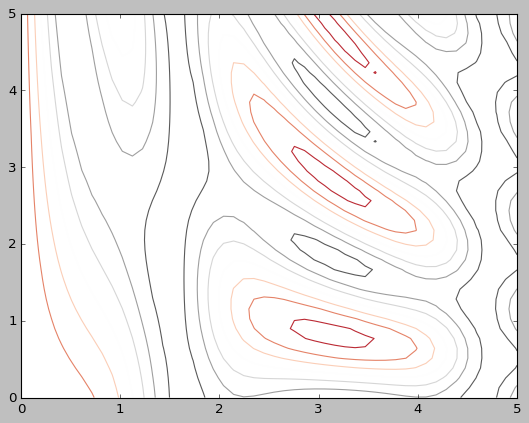

In [89]:
plt.contour(X, Y, Z, cmap='RdGy');

我们还可以指定在数据范围内生成 20 条等高线，如下图所示：

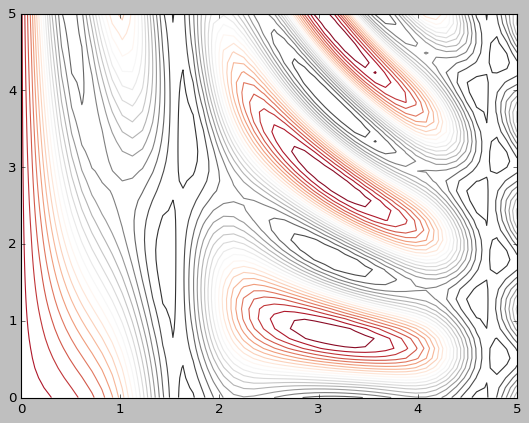

In [90]:
plt.contour(X, Y, Z, 20, cmap='RdGy'); 
# 自动在 Z 值的最小值和最大值之间生成约 20 条等高线

我们可以通过使用 plt.contourf 函数实现填充等高线图的作用，其语法与 plt.contour 基本相同。¶

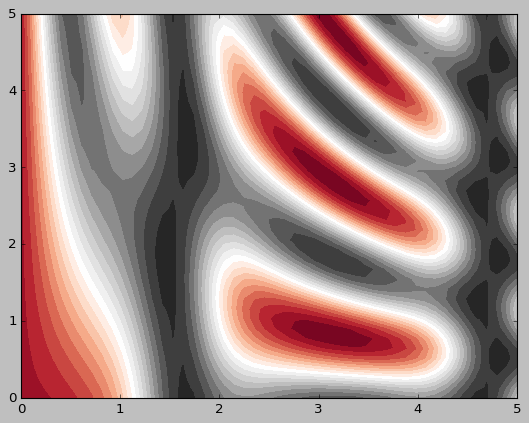

In [91]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')

此外，我们使用 plt.colorbar 命令创建一个色彩条：

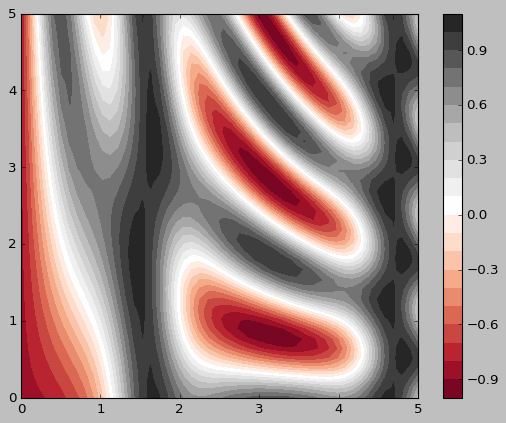

In [92]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

颜色条表明，黑色区域是 “山峰”，而红色区域是 “山谷”。


这张图存在的一个潜在问题是：颜色的过渡不连续，呈阶梯状，并非我们所期望的效果。
可以通过将等高线的数量设置得非常高来解决这个问题，但这会导致绘图效率相当低。


生成平滑图形的更好方法是使用 plt.imshow 函数，该函数提供了 interpolation（插值）参数，可用于生成数据的平滑二维表示：¶

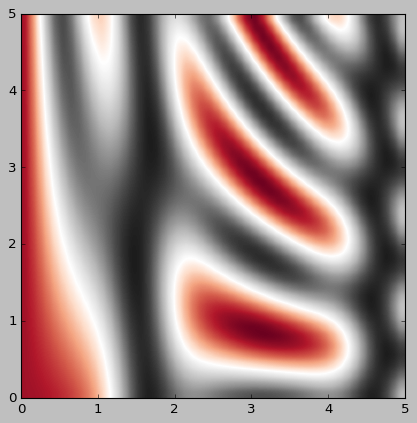

In [93]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy',
           interpolation='gaussian', aspect='equal')
#extent=[0, 5, 0, 5]，定义数据在坐标轴上的范围，格式为[xmin, xmax, ymin, ymax]
#origin='lower'，设置数组的原点位置，'lower'表示数组的第一行在图像底部
#cmap='RdGy'，使用的颜色映射(colormap)
#interpolation='gaussian'，像素插值方法，'gaussian'使用高斯模糊进行插值，使图像更平滑
#aspect='equal'，控制轴的纵横比，'equal'确保x和y轴的单位长度相同

#与之前的plt.contour()相比，这个imshow版本有以下特点：
#不是绘制等高线，而是将Z值直接映射为颜色，插值处理使图像更平滑，减少像素化

可以将等高线图和图像结合起来：

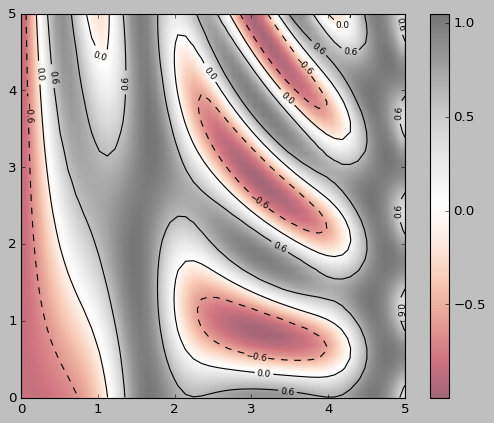

In [94]:
#绘制等高线图，返回ContourSet对象赋值给contours变量
contours = plt.contour(X, Y, Z, 3, colors='black')
#为等高线添加数值标签
plt.clabel(contours, inline=True, fontsize=8) 
#contours：之前创建的ContourSet对象
#inline=True：标签会覆盖在等高线上(删除对应线段)

#显示Z矩阵的图像表示
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.6)
#添加颜色条(色标)
plt.colorbar();

# 直方图、数据区间划分和分布密度

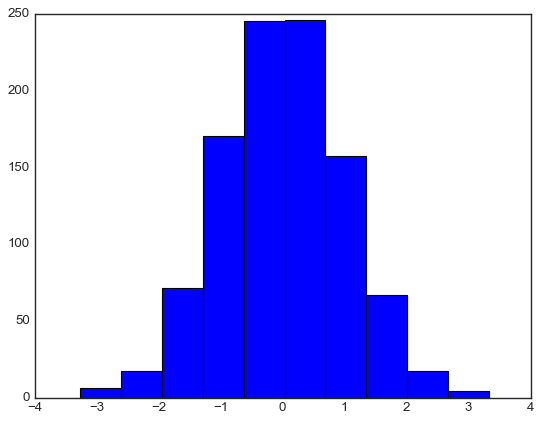

In [95]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

rng = np.random.default_rng(1701)
data = rng.normal(size=1000)
plt.hist(data);

hist 函数有许多选项，可用于调整计算过程和显示效果：

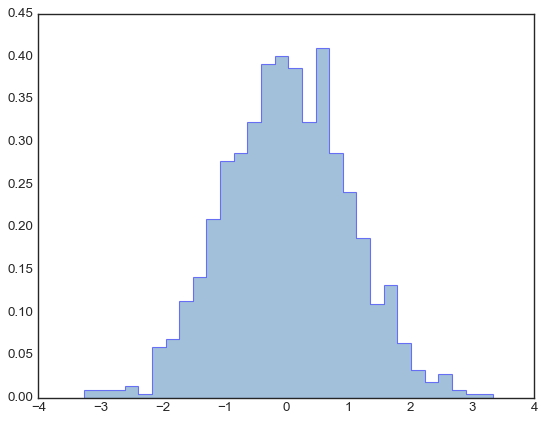

In [97]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='blue');
#bins=30，将数据范围分成30个等宽区间
#density=True，标准化直方图，使面积为1
#alpha=0.5，设置透明度为50%
#histtype='stepfilled'，填充阶梯状直方图
#color='steelblue' 设置填充颜色为钢蓝色
#edgecolor='blue'，设置边缘颜色为蓝色

当比较几种分布的直方图时，将 histtype='stepfilled' 与一定的透明度 alpha 结合使用会很有帮助：¶

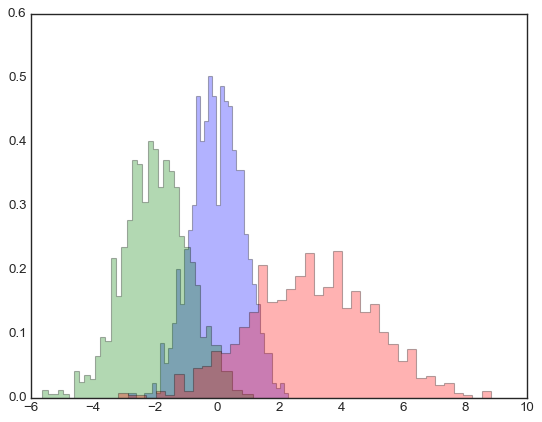

In [98]:
x1 = rng.normal(0, 0.8, 1000)
x2 = rng.normal(-2, 1, 1000)
x3 = rng.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

如果你只想统计各个区间内的数据点数量，而不进行可视化展示，那么可以使用 np.histogram 函数：

In [99]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 23 241 491 224  21]


## 二维频次直方图和数据区间划分¶

就像我们通过将数轴划分为若干区间来创建一维直方图一样，我们也可以通过将点划分到二维区间中，来创建二维直方图

首先，我们定义一些数据，即从多元高斯分布中抽取 x 和 y 数组

In [100]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = rng.multivariate_normal(mean, cov, 10000).T

使用 plt.hist2d 画二维直方图¶

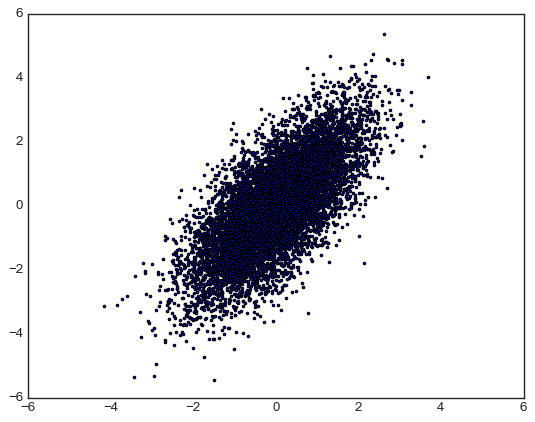

In [102]:
# 画出这些数据点
plt.scatter(x, y, marker='.');

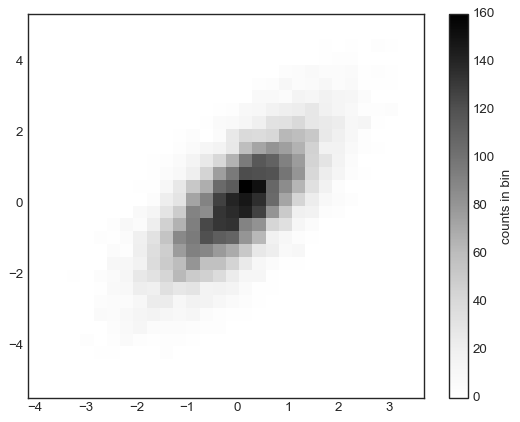

In [104]:
plt.hist2d(x, y, bins=30)
#x, y：输入的两个一维数据数组，代表x轴和y轴坐标
#bins=30：将x和y方向各分为30个区间(共900个格子)
cb = plt.colorbar()
#功能：添加颜色条(图例)
cb.set_label('counts in bin')
#功能：设置颜色条标签

plt.hist2d 也有对应的 np.histogram2d 函数：

In [105]:
counts, xedges, yedges = np.histogram2d(x, y, bins=3)
print(counts.shape)

(3, 3)


## 核密度估计¶

另一种常用于在多维空间中估计和表示概率密度的方法是 核密度估计（Kernel Density Estimation，KDE）。

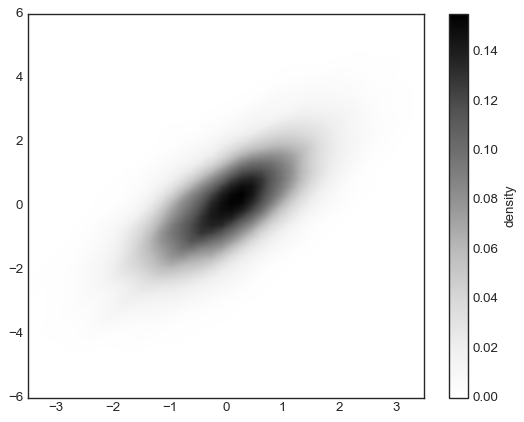

In [106]:
from scipy.stats import gaussian_kde # 导入高斯核密度估计函数

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y]) # 将x,y数据垂直堆叠成(2, N)的数组
kde = gaussian_kde(data) # 创建高斯KDE模型，自动计算最佳带宽

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)  # x轴范围-3.5到3.5，40等分
ygrid = np.linspace(-6, 6, 50)  # y轴范围-6到6，50等分
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)  # 生成40×50的网格坐标矩阵
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()])) # 将网格点展平后输入KDE模型，
#得到每个点的密度估计值

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),  # 将Z值重塑为网格形状
           origin='lower', # 原点在左下角(默认在左上)
           aspect='auto',  # 自动调整宽高比
           extent=[-3.5, 3.5, -6, 6])  # 设置坐标轴范围[xmin,xmax,ymin,ymax]
cb = plt.colorbar()  # 添加颜色条 
cb.set_label("density")